In [1]:
import pandas as pd
import numpy as np

In [2]:
def_df = pd.read_csv("/Users/alyssaliu/Desktop/StatsM148/Event Definitions.csv")
cleaned_df = pd.read_csv("/Users/alyssaliu/Desktop/StatsM148/fingerhut_combined.csv")

In [3]:
def_df

,event_name,journey_id,event_definition_id,milestone_number,stage
0,application_phone_approved,1,15,1.0,Apply for Credit
1,application_phone_declined,1,16,NaN,Apply for Credit
2,application_phone_pending,1,17,NaN,Apply for Credit
3,application_web_approved,1,12,1.0,Apply for Credit
4,application_web_declined,1,13,NaN,Apply for Credit
5,application_web_pending,1,14,NaN,Apply for Credit
6,application_web_submit,1,3,NaN,Apply for Credit
7,application_web_view,1,19,NaN,Apply for Credit
8,account_activitation,1,29,3.0,Credit Account
9,account_fraud_review,1,37,NaN,Credit Account


In [4]:
cleaned_df.head()

,customer_id,account_id,ed_id,event_name,event_timestamp,combined_id,journey_steps_until_end
0,1807905151,-2147477843,2,campaign_click,2021-09-03T06:00:00.000Z,0,0
1,1807905151,-2147477843,12,application_web_approved,2021-09-03T21:46:20.000Z,0,1
2,1807905151,-2147477843,1,promotion_created,2021-09-03T21:46:26.680Z,0,2
3,1807905151,-2147477843,4,browse_products,2021-09-03T21:48:59.000Z,0,3
4,1807905151,-2147477843,4,browse_products,2021-09-03T21:55:06.000Z,0,4


In [5]:
cleaned_df['event_timestamp'] = pd.to_datetime(cleaned_df['event_timestamp']) # convert to pd datetime

In [6]:
cleaned_df

,customer_id,account_id,ed_id,event_name,event_timestamp,combined_id,journey_steps_until_end
0,1807905151,-2147477843,2,campaign_click,2021-09-03 06:00:00+00:00,0,0
1,1807905151,-2147477843,12,application_web_approved,2021-09-03 21:46:20+00:00,0,1
2,1807905151,-2147477843,1,promotion_created,2021-09-03 21:46:26.680000+00:00,0,2
3,1807905151,-2147477843,4,browse_products,2021-09-03 21:48:59+00:00,0,3
4,1807905151,-2147477843,4,browse_products,2021-09-03 21:55:06+00:00,0,4
...,...,...,...,...,...,...,...
56854843,2147449981,-203497522,4,browse_products,2023-07-22 20:47:49+00:00,1665430,37
56854844,2147449981,-203497522,5,view_cart,2023-07-22 20:47:49+00:00,1665430,38
56854845,2147449981,-203497522,11,add_to_cart,2023-07-22 20:47:49+00:00,1665430,39
56854846,2147449981,-203497522,6,begin_checkout,2023-07-22 20:47:49+00:00,1665430,40


In [7]:
# Group by customer_id and calculate time difference between first and last journey step
time_diffs = cleaned_df.groupby('customer_id').apply(
    lambda x: x.loc[x['journey_steps_until_end'].idxmax(), 'event_timestamp'] - x.loc[x['journey_steps_until_end'].idxmin(), 'event_timestamp']
).reset_index(name='time_diff')

time_diffs

,customer_id,time_diff
0,-2147483541,238 days 22:58:14.693000
1,-2147481037,0 days 09:30:54
2,-2147474335,17 days 22:17:10
3,-2147474305,196 days 01:32:49
4,-2147472167,19 days 15:36:06
...,...,...
1665683,2147480051,272 days 01:14:32.280000
1665684,2147480182,0 days 13:56:28
1665685,2147480920,136 days 10:05:28
1665686,2147482120,0 days 06:00:00


In [8]:
# Find the latest event_id for each customer
latest_event = cleaned_df.sort_values('event_timestamp').groupby('customer_id').tail(1)[['customer_id', 'event_name']].reset_index(drop=True)
latest_event

,customer_id,event_name
0,776951101,order_shipped
1,-1337252997,order_shipped
2,421554140,order_shipped
3,-1142127835,order_shipped
4,839837639,begin_checkout
...,...,...
1665683,1826467269,campaignemail_clicked
1665684,1105319523,campaignemail_clicked
1665685,37853864,campaignemail_clicked
1665686,-619872816,campaignemail_clicked


In [9]:
final_df = pd.merge(time_diffs, latest_event, on='customer_id')

In [10]:
final_df.rename(columns = {'event_name' : 'final_event'}, inplace = True)

In [11]:
final_df

,customer_id,time_diff,final_event
0,-2147483541,238 days 22:58:14.693000,promotion_created
1,-2147481037,0 days 09:30:54,browse_products
2,-2147474335,17 days 22:17:10,order_shipped
3,-2147474305,196 days 01:32:49,catalog_(mail)
4,-2147472167,19 days 15:36:06,order_shipped
...,...,...,...
1665683,2147480051,272 days 01:14:32.280000,promotion_created
1665684,2147480182,0 days 13:56:28,campaignemail_clicked
1665685,2147480920,136 days 10:05:28,browse_products
1665686,2147482120,0 days 06:00:00,campaign_click


In [12]:
final_df['time_diff_days'] = final_df['time_diff'].dt.days

In [13]:
final_df

,customer_id,time_diff,final_event,time_diff_days
0,-2147483541,238 days 22:58:14.693000,promotion_created,238
1,-2147481037,0 days 09:30:54,browse_products,0
2,-2147474335,17 days 22:17:10,order_shipped,17
3,-2147474305,196 days 01:32:49,catalog_(mail),196
4,-2147472167,19 days 15:36:06,order_shipped,19
...,...,...,...,...
1665683,2147480051,272 days 01:14:32.280000,promotion_created,272
1665684,2147480182,0 days 13:56:28,campaignemail_clicked,0
1665685,2147480920,136 days 10:05:28,browse_products,136
1665686,2147482120,0 days 06:00:00,campaign_click,0


In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

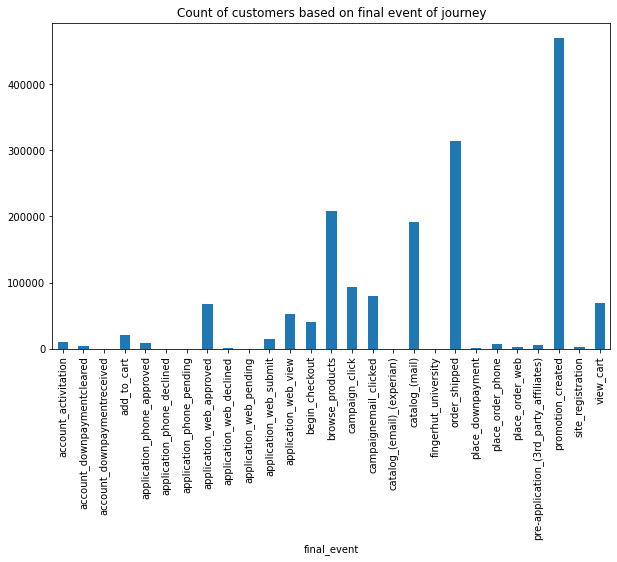

In [15]:
plt.figure(figsize=(10, 6))
final_df.groupby('final_event')['customer_id'].nunique().plot(kind = 'bar')
plt.title("Count of customers based on final event of journey")
plt.show()

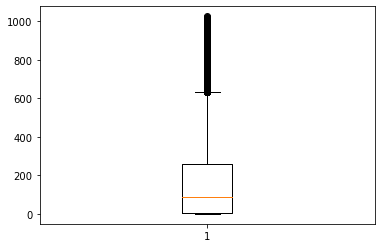

In [16]:
plt.boxplot(final_df['time_diff_days'])
plt.show()

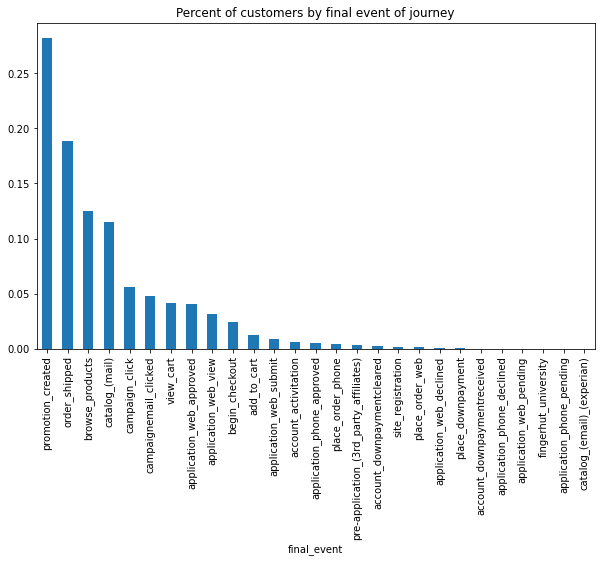

In [17]:
plt.figure(figsize=(10, 6))
final_df['final_event'].value_counts(normalize = True).plot(kind = 'bar')
plt.title("Percent of customers by final event of journey")
plt.show()

### Order Shipped ed_id = 28

In [18]:
# Filter the dataframe for the specific order event ID
order_df = cleaned_df[cleaned_df['ed_id'] == 28]
# Find unique customers who made orders
customers_who_made_orders = order_df['customer_id'].unique()

In [19]:
# Find the first event time for each customer
first_event_time = cleaned_df.groupby('customer_id')['event_timestamp'].first()

# Merge the first event time with the sorted dataframe
df_merged = cleaned_df.merge(first_event_time.rename('first_event_time'), on='customer_id')

# Filter for 'order shipped' events
order_shipped_events = df_merged[df_merged['ed_id'] == 28]

# Calculate the time difference between the first event and each 'order shipped' event
order_shipped_events['time_to_order_shipped'] = order_shipped_events['event_timestamp'] - order_shipped_events['first_event_time']

# The resulting 'order_shipped_events' dataframe now includes the time difference for each 'order shipped' event


<ipython-input-19-c4881ec084b4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_shipped_events['time_to_order_shipped'] = order_shipped_events['event_timestamp'] - order_shipped_events['first_event_time']


In [20]:
order_shipped_events

,customer_id,account_id,ed_id,event_name,event_timestamp,combined_id,journey_steps_until_end,first_event_time,time_to_order_shipped
30,1807905151,-2147477843,28,order_shipped,2021-09-22 00:00:00+00:00,0,30,2021-09-03 06:00:00+00:00,18 days 18:00:00
95,892000766,-2147476504,28,order_shipped,2021-03-01 00:00:00+00:00,1,64,2021-02-20 06:00:00+00:00,8 days 18:00:00
138,845911348,-2147468021,28,order_shipped,2021-12-15 00:00:00+00:00,4,19,2021-11-20 14:49:13+00:00,24 days 09:10:47
394,-1979149930,-2147463978,28,order_shipped,2021-01-25 00:00:00+00:00,6,21,2021-01-19 06:25:55+00:00,5 days 17:34:05
607,980342703,-2147450374,28,order_shipped,2023-05-24 00:00:00+00:00,13,15,2023-05-15 04:09:11+00:00,8 days 19:50:49
...,...,...,...,...,...,...,...,...,...
56852980,2146086454,71026744,28,order_shipped,2023-01-11 00:00:00+00:00,1665404,216,2021-01-21 08:50:51+00:00,719 days 15:09:09
56852986,2146132889,-1140393923,28,order_shipped,2021-06-03 00:00:00+00:00,1665405,5,2021-05-30 15:37:29+00:00,3 days 08:22:31
56853483,2146630425,-825819755,28,order_shipped,2023-05-09 00:00:00+00:00,1665412,21,2021-03-03 06:00:00+00:00,796 days 18:00:00
56853643,2146763235,912543501,28,order_shipped,2021-11-11 00:00:00+00:00,1665415,53,2021-10-29 11:17:15+00:00,12 days 12:42:45


In [21]:
order_shipped_events['days_to_order_shipped'] = order_shipped_events['time_to_order_shipped'].dt.days

<ipython-input-21-4bcdaf7eb932>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_shipped_events['days_to_order_shipped'] = order_shipped_events['time_to_order_shipped'].dt.days


In [22]:
order_shipped_events.reset_index(inplace = True)

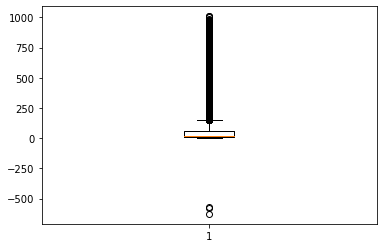

In [27]:
plt.boxplot(order_shipped_events['days_to_order_shipped'])
plt.show()